# Linear Regression


In [4]:
import numpy

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

### Least squares method

Consider system of linear equations $Xa = y$, where $a$ is a column of variables. It can be written using vectors:
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
where $x_1,\ldots,x_k$ — columns of matrix $X$. Therefore, solving the original system means finding the linear combination of vectors $x_1,\ldots,x_k$ that is equal to the right side of equation. But what should we do if there is no such linear combination? Geometrically, it means that vector $y$ does not belong to a subspace $U = \langle x_1,\ldots, x_k\rangle$. In this case we can find an *approximate solution*: vector of coefficients $\hat{a}$, for which the linear combination $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$, even though not equal to $y$, is the best approximation — the point $\hat{y}$ of subspace $U$ closest to $y$ (orthogonal projection of $y$ on this subspace). Thus, our goal can be formulated in two equivalent ways:

1. Find vector $\hat{a}$, for which the length of difference $|X\hat{a} - y|$ is minimal (that's why it's called "least squares");
2. Find orthogonal projection $\hat{y}$ of vector $y$ on subspace $U$ and write it this way: $X\hat{a}$.

From now on, we'll assume that vectors $x_1,\ldots,x_k$ are linearly independent (if not, we should first find the largest linearly independent subsystem).

Projection of vector $y$ on subspace $U = \langle x_1,\ldots, x_k\rangle$ can be written as
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
and the desired vector $\hat{a}$ is equal to
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Task of linear regression

Imagine, you'd like to find how the result S depends on several variables: H, W, L and N. We measured all these parameters in $n$ cases and got lists of values: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

It makes sense to start with the easiest model - the linear one:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Most likely, there is no exact linear dependency, but we can try to find such coefficients $a_1, a_2, a_3, a_4, a_5$ that the right side differs from the observed one as little as possible:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
This is a task for the least squares method:
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Solving this task using the formulas mentioned above, we'll get the coefficients $\hat{a}_i$ ($i = 1\ldots,5$).

The broad task of linear regression. We have $k$ variables $x_1,\ldots,x_k$ ("regressors"), through which we'd like to express the dependent variable $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
The values of all variables have been measured $n$ times ($n$ different objects, $n$ moments in time - depends on a task). Put this data into the previous equality:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(here $x_{ij}$ is a value of $j$th parameter at $i$th measurement). It's convenient to write these equations using matrices:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
or $Xa = y$.

### Assessing the quality

After we've built a regression and found some dependency of variable y on the regressors, it's time to assess the quality of this regression. There are many ways to measure quality, the easiest is called *mean square error*. It is equal to
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

### Task 1. Least squares

Download files ``train.txt`` and ``test.txt``. The first one contains training data, the second one contains testing data. Each file contains two columns of numbers divided by space: there are $n$ points in the first column (values of variable $x$) and $n$ values of some function $y = f(x)$ at these points with some noise in the second column. Based on training data find function $y = g(x)$, that approximates the dependency well.

In [376]:
data_train = numpy.loadtxt('/Users/mac/Downloads/train.txt', delimiter=',')
data_test = numpy.loadtxt('/Users/mac/Downloads/test.txt', delimiter=',')

In [377]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]

Using least squares method find linear function ($y = kx + b$) that best approximates the unknown dependency.

In [53]:
second_column = numpy.ones((21, 1))
train = X_train[..., None]
X = numpy.concatenate((train, second_column), axis=1)
XT = X.transpose()
INV = numpy.dot(XT, X)
INV = numpy.linalg.inv(INV)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_train)
k = A[0]
b = A[1]
print(str(k) + 'x + ' + str(b))

2.27913449805195x + 4.433230905064935


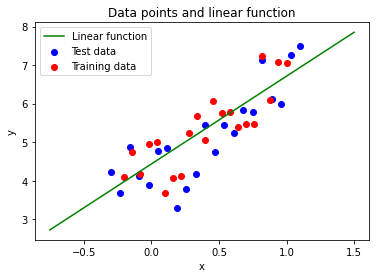

In [38]:
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.scatter(X_train, y_train, color='red', label='Training data')
x = np.linspace(-0.75,1.5,100)
y = k * x + b
plt.plot(x, y, color='green', label='Linear function')
plt.title('Data points and linear function')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

Find some polynomial that might approximate this function well and print it as $a_0 + a_1 x + \ldots a_k x^k$.

In [121]:
superscript = ["⁰", "¹", "²", "³", "⁴", "⁵", "⁶", "⁷", "⁸", "⁹", "¹⁰"]
X = numpy.ones((21, 1))
t = X_train[..., None]
train = numpy.ones((21, 1))
for i in range(1, 8):
    for j in range(21):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
XT = X.transpose()
INV = numpy.dot(XT, X)
INV = numpy.linalg.inv(INV)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_train)
ans = str(A[0])
for k in range(1, len(A)):
    if (A[k] < 0):
        ans += ' - '
        ans += str((-1) * A[k])
    else:
        ans += ' + '
        ans += str(A[k])
    ans += 'x'
    if (k != 1):
        ans += superscript[k]
print(ans)

4.444512707325783 - 4.008895914050697x + 7.215458625626539x² + 119.35078422146287x³ - 314.23117230246x⁴ + 122.87821665246247x⁵ + 238.69936824883825x⁶ - 167.38196488774565x⁷


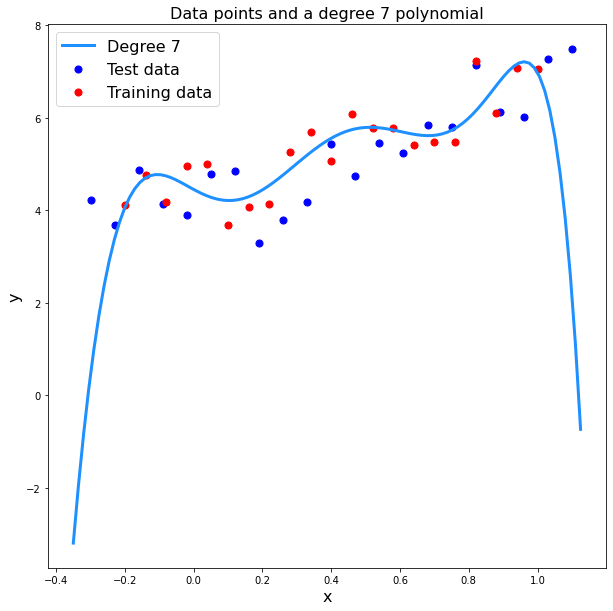

In [123]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color='blue', label='Test data', s=50)
plt.scatter(X_train, y_train, color='red', label='Training data', s=50)
x = np.linspace(-0.35,1.125,100)
X = numpy.ones((21, 1))
t = X_train[..., None]
train = numpy.ones((21, 1))
for i in range(1, 8):
    for j in range(21):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
XT = X.transpose()
INV = numpy.dot(XT, X)
INV = numpy.linalg.inv(INV)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_train)
y = A[0]
deg = 1
for k in range(1, len(A)):
    deg *= x;
    y += deg * A[k]
plt.plot(x, y, color='dodgerblue', label='Degree 7', linewidth=3)
plt.title('Data points and a degree 7 polynomial', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.legend(fontsize=16)

For $k = 1,2,3,\ldots,10$ find polynomial $\hat{f}_k$ of power $k$ that best approximates the unknown dependency. Print the resulting polynomials as $a_0 + a_1 x + \ldots a_k x^k$.

In [75]:
superscript = ["⁰", "¹", "²", "³", "⁴", "⁵", "⁶", "⁷", "⁸", "⁹", "¹⁰"]
X = numpy.ones((21, 1))
t = X_train[..., None]
train = numpy.ones((21, 1))
for i in range(1, 11):
    for j in range(21):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
    XT = X.transpose()
    INV = numpy.dot(XT, X)
    a, b = INV.shape
    INV = numpy.linalg.inv(INV)
    A = numpy.dot(INV, XT)
    A = numpy.dot(A, y_train)
    ans = str(A[0])
    for k in range(1, len(A)):
        if (A[k] < 0):
            ans += ' - '
            ans += str((-1) * A[k])
        else:
            ans += ' + '
            ans += str(A[k])
        ans += 'x'
        if (k != 1):
            ans += superscript[k]
    print(ans)
    print('\n')

4.433230905064935 + 2.2791344980519463x


4.472476503404162 + 1.1578316883597481x + 1.4016285121152738x²


4.4607363552851425 + 1.065016105285058x + 1.8597508372613332x² - 0.38176860428826x³


4.341166120398974 + 1.171802392634403x + 6.794091784357896x² - 13.051328119992206x³ + 7.918474697316007x⁴


4.431297813818277 - 0.13059803989036212x + 3.2747144018600167x² + 21.374796276237063x³ - 51.13148138545856x⁴ + 29.524978041388295x⁵


4.383795010995512 - 4.597179325133645x + 16.002903989918615x² + 121.25709713212586x³ - 481.51013288793615x⁴ + 581.453298243664x⁵ - 229.97013341826778x⁶


4.444512707325783 - 4.008895914050697x + 7.215458625626539x² + 119.35078422146287x³ - 314.23117230246x⁴ + 122.87821665246247x⁵ + 238.69936824883825x⁶ - 167.38196488774565x⁷


4.663789159674868 - 5.182773520022789x - 26.695632102178987x² + 268.8604433094429x³ + 109.89567721382991x⁴ - 3132.8564583224143x⁵ + 6760.628597582669x⁶ - 5701.710301341856x⁷ + 1729.4776048747271x⁸


4.645883993965888 - 4.552702596784918

For each of these polynomials find mean square error on train data and test data: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$.

In [133]:
X = numpy.ones((21, 1))
X_t = numpy.ones((21, 1))
t = X_train[..., None]
t_test = X_test[..., None]
train = numpy.ones((21, 1))
test = numpy.ones((21, 1))
for i in range(1, 11):
    for j in range(21):
        train[j][0] = train[j][0] * t[j][0]
        test[j][0] = test[j][0] * t_test[j][0]
    X = numpy.concatenate((X, train), axis=1)
    X_t = numpy.concatenate((X_t, test), axis=1)
    XT = X.transpose()
    INV = numpy.dot(XT, X)
    INV = numpy.linalg.inv(INV)
    A = numpy.dot(INV, XT)
    A = numpy.dot(A, y_train)
    res = numpy.dot(X, A[..., None])
    y = y_train[..., None]
    diff = res - y
    error = 0
    res_test = numpy.dot(X_t, A[..., None])
    y_t = y_test[..., None]
    diff_test = res_test - y_t
    error_test = 0
    for k in range(len(diff)):
        error += diff[k][0] ** 2
        error_test += diff_test[k][0] ** 2
    error /= 21
    error_test /= 21
    print("Polynomial degree: " + str(i))
    print("Training data error: " + str(error))
    print("Test data error: " + str(error_test) + '\n')

Polynomial degree: 1
Training data error: 0.29689663326251964
Test data error: 0.4351202004048878

Polynomial degree: 2
Training data error: 0.2696989158766913
Test data error: 0.35647628878312543

Polynomial degree: 3
Training data error: 0.269497187147961
Test data error: 0.35534645715186697

Polynomial degree: 4
Training data error: 0.26106653305792726
Test data error: 0.44172701892836014

Polynomial degree: 5
Training data error: 0.249985046483175
Test data error: 0.5579732021610808

Polynomial degree: 6
Training data error: 0.18829348988370243
Test data error: 2.5816929331826204

Polynomial degree: 7
Training data error: 0.18539621153294475
Test data error: 2.51578289380375

Polynomial degree: 8
Training data error: 0.15905556579091945
Test data error: 4.3572889280485425

Polynomial degree: 9
Training data error: 0.1584718427476326
Test data error: 4.776337698684242

Polynomial degree: 10
Training data error: 0.15316611018949025
Test data error: 14.63240471129067



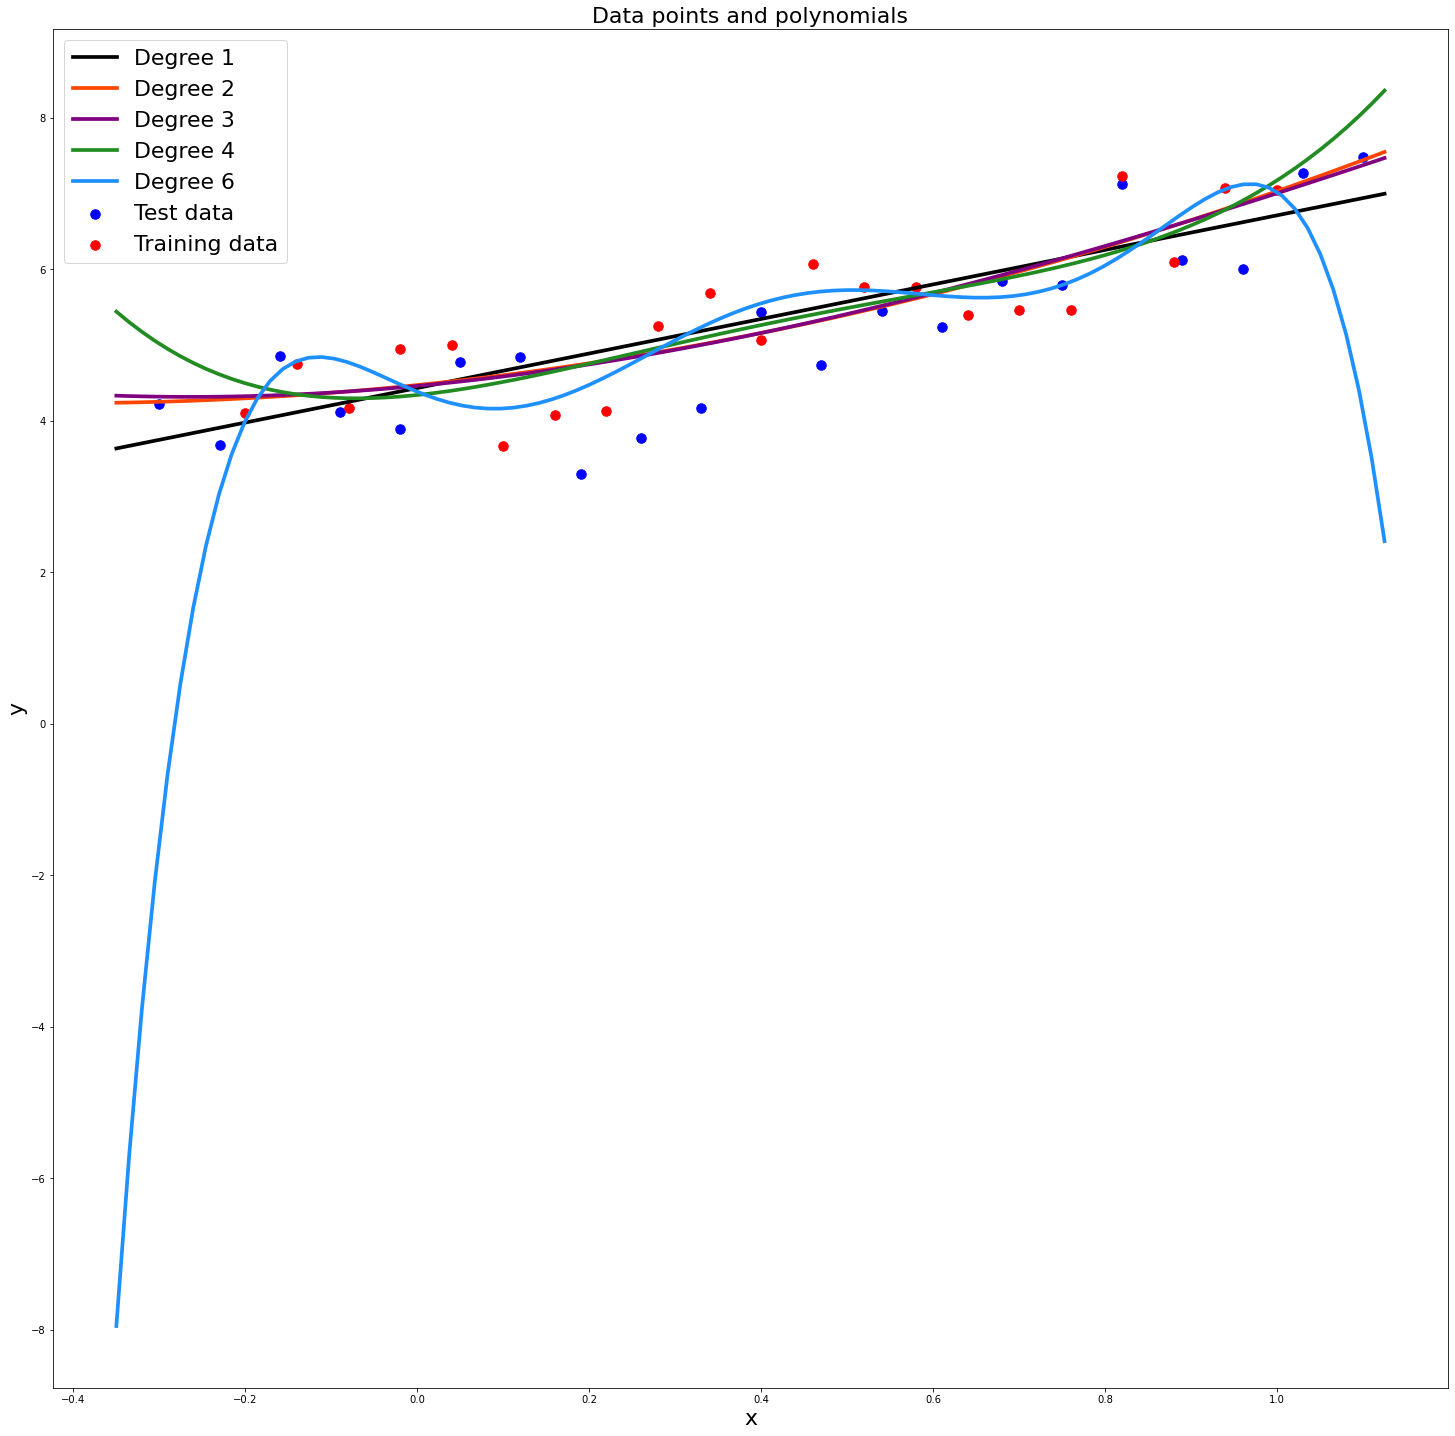

In [386]:
plt.figure(figsize=(25, 25))
plt.scatter(X_test, y_test, color='blue', label='Test data', s=90)
plt.scatter(X_train, y_train, color='red', label='Training data', s=90)
x = np.linspace(-0.35,1.125,100)
numbers = [1, 2, 3, 4, 6]
colors = ['black', 'orangered', 'purple', 'forestgreen', 'dodgerblue']
labels = ['Degree 1', 'Degree 2', 'Degree 3', 'Degree 4', 'Degree 6']
X = numpy.ones((21, 1))
t = X_train[..., None]
train = numpy.ones((21, 1))
ind = -1;
for i in numbers:
    ind += 1
    for j in range(21):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
    if (i == 6):
        for j in range(21):
            train[j][0] = train[j][0] * t[j][0]
        X = numpy.concatenate((X, train), axis=1)
    XT = X.transpose()
    INV = numpy.dot(XT, X)
    a, b = INV.shape
    INV = numpy.linalg.inv(INV)
    A = numpy.dot(INV, XT)
    A = numpy.dot(A, y_train)
    y = A[0]
    deg = 1
    for k in range(1, len(A)):
        deg *= x;
        y += A[k] * deg
    plt.plot(x, y, color=colors[ind], label=labels[ind], linewidth=3.7)
plt.title('Data points and polynomials', fontsize=22)
plt.ylabel('y', fontsize=22)
plt.xlabel('x', fontsize=22)
plt.legend(fontsize=22)

### Task 2. Linear regression

Download files ``flats_moscow_mod.txt`` and ``flats_moscow_description.txt``. The first one contains data on flats in Moscow. Each row contains six characteristics of a flat, divided by tabulations: price, total space, living space, space of a kitchen, distance from city center, distance from a closest subway station; the first row contains code names of characteristics. The second file contains short descriptions of parameters.

In [286]:
from sklearn.model_selection import train_test_split
data = numpy.loadtxt('/Users/mac/Downloads/flats_moscow_mod.txt', skiprows=1)
y = data[:,0]
X = data[:,1:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Using least squares find some linear dependency between the price of a flat and the rest of parameters.

In [287]:
X = numpy.concatenate((X_train.copy(), numpy.ones((len(X_train), 1))), axis=1)
XT = X.transpose()
INV = numpy.dot(XT, X)
INV = numpy.linalg.inv(INV)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_train)
print('Price = ' + str(A[0]) + ' * totsp + ' + str(A[1]) + ' * livesp + ' + str(A[2]) +
     ' * kitsp - ' + str((-1) * A[3]) + ' * dist - ' + str((-1) * A[4]) +
     ' * metrdist - ' + str((-1) * A[5]))

Price = 1.5949749963768383 * totsp + 1.0603389771036742 * livesp + 2.06904991343508 * kitsp - 3.4119895138227907 * dist - 1.3861215319193763 * metrdist - 8.100900294760876


Calculate mean square error on test data.

In [285]:
X_new = numpy.concatenate((X_test, numpy.ones((len(X_test), 1))), axis=1)
res = numpy.dot(X_new, A[..., None])
y = y_test[..., None]
diff = res - y
error = 0
for k in range(len(diff)):
    error += diff[k][0] ** 2
error /= len(diff)
print("Test data error: " + str(error))

Test data error: 1226.7814210409726


### Making the model more complicated

There is no guarantee that the relationship between the dependent variable (price of the flat) and other parameters is linear. For example, the dependency can be square or logarithmic, moreover, not just the separate factors can be important but their combinations also. It can be taken into account by adding functions of existing parameters as new parameters (e.g. their squares, logarithms, products).

Try to improve the quality of the model by adding new parameters that are functions of existing parameters. But be careful, overcomplication of the model can lead to overfitting.

New parameters:

Product of distances from the city center and the closest subway station

Logarithm of space of the kitchen

Square of space of the living area

In [292]:
import math
totsp = X_train[:, 0].copy()
livesp = X_train[:, 1].copy()
kitsp = X_train[:, 2].copy()
dist = X_train[:, 3].copy()
metrdist = X_train[:, 4].copy()
X = X_train.copy()
X = numpy.concatenate((X, numpy.ones((len(X), 1))), axis=1)
square = livesp[..., None]
for j in range(len(square)):
    square[j][0] *= square[j][0]
X = numpy.concatenate((X, square), axis=1)
mult = (dist * metrdist)[..., None]
X = numpy.concatenate((X, mult), axis=1)
logs = kitsp[..., None]
for j in range(len(logs)):
    logs[j][0] = math.log(logs[j][0])
X = numpy.concatenate((X, logs), axis=1)
XT = X.transpose()
INV = numpy.dot(XT, X)
INV = numpy.linalg.inv(INV)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_train)
print('Price = ' + str(A[0]) + ' * totsp - ' + str((-1) * A[1]) + ' * livesp + ' +
      str(A[2]) + ' * kitsp - ' + str((-1) * A[3]) + ' * dist - ' + str((-1) * A[4]) +
      ' * metrdist + ' + str(A[5]) + ' + '+ str(A[6]) + ' * square + ' +
      str(A[7]) + ' * product + ' + str(A[8]) + ' * logarithm')

Price = 1.4600211696647376 * totsp - 5.928129527845288 * livesp + 1.1007709493547377 * kitsp - 4.4353316308843524 * dist - 2.679080177320884 * metrdist + 163.670644030735 + 0.06942485571902114 * square + 0.13259860569566506 * product + 12.659266265376168 * logarithm


Calculate mean square error on test data

In [293]:
totsp = X_test[:, 0].copy()
livesp = X_test[:, 1].copy()
kitsp = X_test[:, 2].copy()
dist = X_test[:, 3].copy()
metrdist = X_test[:, 4].copy()
X_t = X_test.copy()
X_t = numpy.concatenate((X_t, numpy.ones((len(X_t), 1))), axis=1)
square = livesp[..., None]
for j in range(len(square)):
    square[j][0] *= square[j][0]
X_t = numpy.concatenate((X_t, square), axis=1)
mult = (dist * metrdist)[..., None]
X_t = numpy.concatenate((X_t, mult), axis=1)
logs = kitsp[..., None]
for j in range(len(logs)):
    logs[j][0] = math.log(logs[j][0])
X_t = numpy.concatenate((X_t, logs), axis=1)
res = numpy.dot(X_t, A[..., None])
y = y_test[..., None]
diff = res - y
error = 0
for k in range(len(diff)):
    error += diff[k][0] ** 2
error /= len(diff)
print("Test data error: " + str(error))

Test data error: 926.9919006055145


### Task 3. Regularization

The task of linear regression is formulated as a task of finding the projection of a vector of values of a dependent variable on a span of $\langle x_1,\ldots,x_k\rangle$ vectors of values of regressors. If vectors $x_1,\ldots,x_k$ are linearly dependent, then the matrix $X^TX$ is singular and the task cannot be solved using the aforementioned formula. Thankfully, in reality different parameters are not usually *exactly* linearly dependent, but in many situations they are correlated and become "almost" linearly dependent. For example, a person's salary, his education level, price of his car and total space of real estate he owns. In this case matrix $X^TX$ will be close to a singular one and it leads to numeric instability and bad solution quality,  as a result, overfitting will take place. One of the symptoms of this problem - unusually large absolute values of vector $a$.

There are many ways to fix this, one of them is called regularisation. Let's consider one version of regularisation called **L2-regularization**. The idea is to improve the matrix $X^TX$, make it "better". For example, it can be done by replacing it with $(X^TX + \lambda E)$, where $\lambda > 0$ is some scalar. By sacrificing accuracy on the training dataset we get a more numerically stable approximate solution $a = (X^TX + \lambda E)^{-1}X^Ty$ and lower overfitting. *Hyperparameter* $\lambda$ needs to be selected and there are no universal ways to do it, but it often can be selected so that the error on test data lowers.

There are several rules that should be followed when selecting the regularization coefficient. In such cases the dataset is often split into three parts: training, *validation* and testing. First, a hyperparameter value is chosen using the validation data, then a model is formed using training data, and the final quality of a model is determined using test data. Also, $\lambda$ should be selected logarithmically to find the optimal scale of a coefficient.

In the first task the error was high when approximating a function with a polynomial with degree six. Try to use regularisation when building a model. Split the training dataset into two, one of which will become validation dataset.

In [370]:
data_train = numpy.loadtxt('/Users/mac/Downloads/train.txt', delimiter=',')
data_test = numpy.loadtxt('/Users/mac/Downloads/test.txt', delimiter=',')
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]
from sklearn.model_selection import train_test_split
y = y_train.copy()
X = X_train.copy()
X_train, X_validate, y_train, y_validate = train_test_split(
    X, y, test_size=0.45, random_state=42)

Make sure that when using regularization with a properly selectied coefficient $\lambda$, error on test data can be made no bigger than the one for the optimal polynomial degree in a model without regulation.

In [374]:
min_error = 2.5816929331826204
min_lambda = 0
for deg in range(-5, 6):
    lmbd = pow(10, deg)
    X = numpy.ones((10, 1))
    t = X_validate[..., None]
    validate = numpy.ones((10, 1))
    for i in range(1, 7):
        for j in range(10):
            validate[j][0] = validate[j][0] * t[j][0]
        X = numpy.concatenate((X, validate), axis=1)
    XT = X.transpose()
    XTX = numpy.dot(XT, X)
    Elmbd = numpy.identity(len(XTX)) * lmbd
    XTX = XTX + Elmbd
    INV = numpy.linalg.inv(XTX)
    A = numpy.dot(INV, XT)
    A = numpy.dot(A, y_validate)
    res = numpy.dot(X, A[..., None])
    y = y_validate[..., None]
    diff = res - y
    error = 0
    for k in range(len(diff)):
        error += diff[k][0] ** 2
    error /= 10
    if error < min_error:
        min_error = error
        min_lambda = lmbd
current = 0
current += min_lambda
for i in range(1, 10):
    lmbd = current * i
    X = numpy.ones((10, 1))
    t = X_validate[..., None]
    validate = numpy.ones((10, 1))
    for i in range(1, 7):
        for j in range(10):
            validate[j][0] = validate[j][0] * t[j][0]
        X = numpy.concatenate((X, validate), axis=1)
    XT = X.transpose()
    XTX = numpy.dot(XT, X)
    Elmbd = numpy.identity(len(XTX)) * lmbd
    XTX = XTX + Elmbd
    INV = numpy.linalg.inv(XTX)
    A = numpy.dot(INV, XT)
    A = numpy.dot(A, y_validate)
    res = numpy.dot(X, A[..., None])
    y = y_validate[..., None]
    diff = res - y
    error = 0
    for k in range(len(diff)):
        error += diff[k][0] ** 2
    error /= 10
    if error <= min_error:
        min_error = error
        min_lambda = lmbd
X = numpy.ones((11, 1))
t = X_train[..., None]
train = numpy.ones((11, 1))
for i in range(1, 7):
    for j in range(11):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
XT = X.transpose()
XTX = numpy.dot(XT, X)
Elmbd = numpy.identity(len(XTX)) * min_lambda
XTX = XTX + Elmbd
INV = numpy.linalg.inv(XTX)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_train)
X_t = numpy.ones((21, 1))
t_test = X_test[..., None]
test = numpy.ones((21, 1))
for i in range(1, 7):
    for j in range(21):
        test[j][0] = test[j][0] * t_test[j][0]
    X_t = numpy.concatenate((X_t, test), axis=1)
res_test = numpy.dot(X_t, A[..., None])
y_t = y_test[..., None]
diff_test = res_test - y_t
error_test = 0
for k in range(len(diff_test)):
    error_test += diff_test[k][0] ** 2
error_test /= 21
print("Lambda: " + str(min_lambda) + '\n')
print("Test data error: " + str(error_test) + '\n')

Lambda: 1e-05

Test data error: 0.37591183815979856



Compare $\det(X^TX)$ and $\det(X^TX + \lambda E)$ for this $\lambda$.

In [247]:
X = numpy.ones((11, 1))
t = X_train[..., None]
train = numpy.ones((11, 1))
for i in range(1, 7):
    for j in range(11):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
XT = X.transpose()
XTX = numpy.dot(XT, X)
print(numpy.linalg.det(XTX))
Elmbd = numpy.identity(len(XTX)) * min_lambda
XTX = XTX + Elmbd
print(numpy.linalg.det(XTX))

9.397084942630948e-16
9.20571554338306e-14


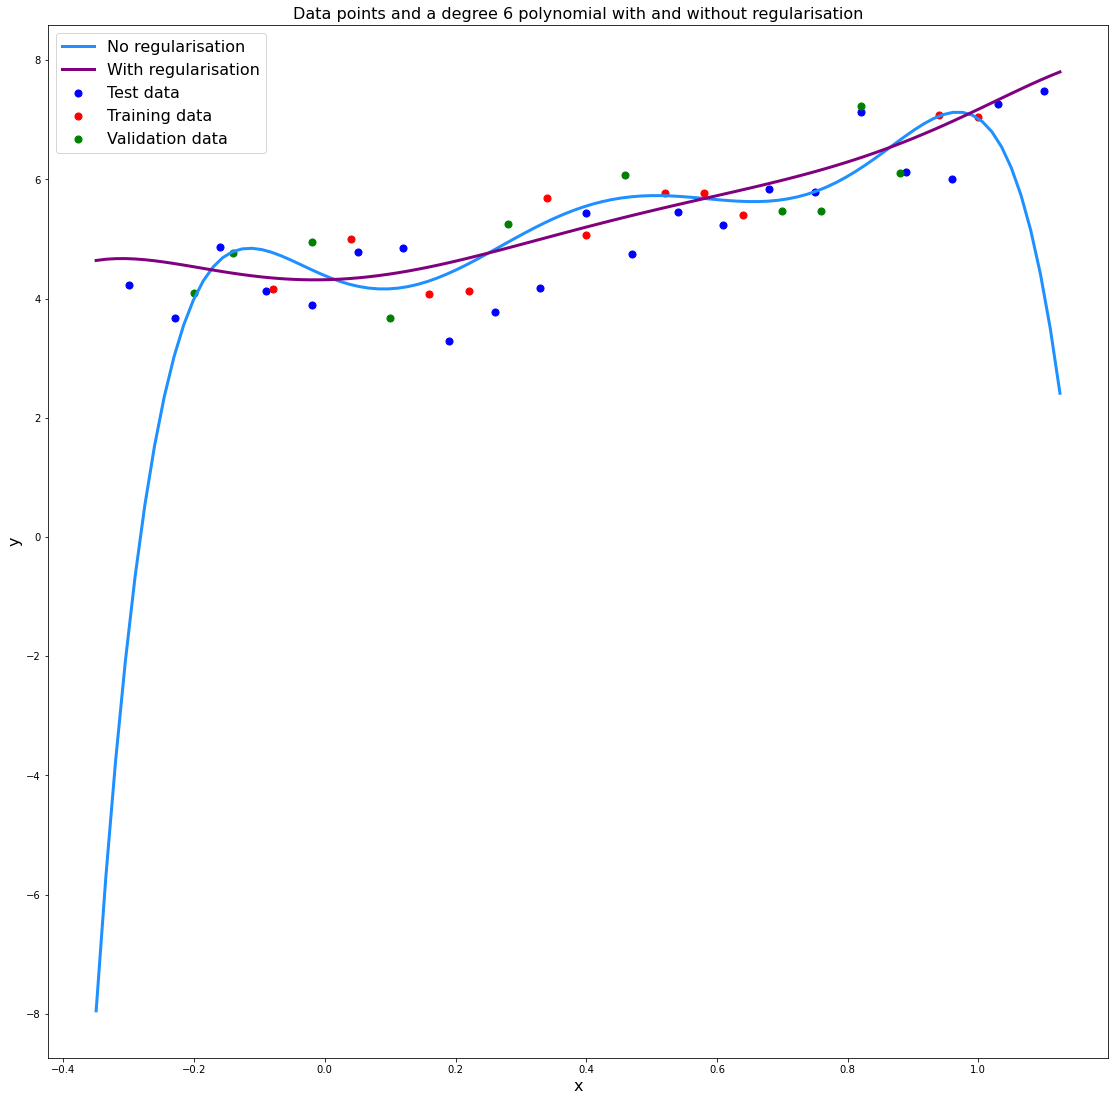

In [274]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(19, 19))
plt.scatter(X_test, y_test, color='blue', label='Test data', s=50)
plt.scatter(X_train, y_train, color='red', label='Training data', s=50)
plt.scatter(X_validate, y_validate, color='green', label='Validation data', s=50)
x = np.linspace(-0.35,1.125,100)
X_united = numpy.concatenate((X_train, X_validate), axis=0)
y_united = numpy.concatenate((y_train, y_validate), axis=0)
X = numpy.ones((21, 1))
t = X_united[..., None]
train = numpy.ones((21, 1))
for i in range(1, 7):
    for j in range(21):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
XT = X.transpose()
INV = numpy.dot(XT, X)
INV = numpy.linalg.inv(INV)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_united)
y = A[0]
deg = 1
for k in range(1, len(A)):
    deg *= x;
    y += deg * A[k]
plt.plot(x, y, color='dodgerblue', label='No regularisation', linewidth=3)
X = numpy.ones((11, 1))
t = X_train[..., None]
train = numpy.ones((11, 1))
for i in range(1, 7):
    for j in range(11):
        train[j][0] = train[j][0] * t[j][0]
    X = numpy.concatenate((X, train), axis=1)
XT = X.transpose()
XTX = numpy.dot(XT, X)
Elmbd = numpy.identity(len(XTX)) * min_lambda
XTX = XTX + Elmbd
INV = numpy.linalg.inv(XTX)
A = numpy.dot(INV, XT)
A = numpy.dot(A, y_train)
y = A[0]
deg = 1
for k in range(1, len(A)):
    deg *= x;
    y += deg * A[k]
plt.plot(x, y, color='purple', label='With regularisation', linewidth=3)
plt.title('Data points and a degree 6 polynomial with and without regularisation',
          fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.legend(fontsize=16)

### Task 4. Linear regression with online learning

In previous tasks we had objects $x_i$ and values $y_i$ given from the very beginning and always available. Suppose that now pairs $(x_i, y_i)$ become available one-by-one, and we can't keep them all in memory (it can be the case when trying to teach a model on a device with limited memory, e.g. a phone or a computer on a satellite). Then a following task needs to be solved:

**Known:** solution for regression task for dataset $(x_1, y_1),\ldots,(x_t,y_t)$;

**Input:** new pair $(x_{t+1}, y_{t+1})$;

**Required:** quickly (in time independent from $t$) find a solution for the regression task for a bigger dataset $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Denote $X_{(t)} = (x_1\ldots x_t)^T$ and $y_{(t)} = (y_1,\ldots,y_t)^T$. Then the task for regression for dataset $(x_1, y_1),\ldots,(x_t,y_t)$ looks like $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Sizes of matrices $X^T_{(t)}X_{(t)}$ and $X^T_{(t)}y_{(t)}$ don't depend on $t$, so we can store them in memory.

Create an algorithm that takes matrices $X^T_{(t)}X_{(t)}$ and $X^T_{(t)}y_{(t)}$ and a pair of values $(x_{t+1}, y_{t+1})$ as input and finds matrices $X^T_{(t+1)}X_{(t+1)}$ and $X^T_{(t+1)}y_{(t+1)}$. Its complexity should not depend on $t$.

Algorithm:

$X^T_{(t+1)}y_{(t+1)}$ = $X^T_{(t)}y_{(t)}$ + $x_{(t+1)}y_{t+1}$

$X^T_{(t+1)}X_{(t+1)}$ = $X^T_{(t)}X_{(t)}$ + $x_{(t+1)}x_{(t+1)}^T$

Proof:

$X_{(t)} = (x_1\ldots x_t)^T$, $y_{(t)} = (y_1,\ldots,y_t)^T$

$X^T_{(t)}y_{(t)}$ = $(x_1\ldots x_t)$ $(y_1,\ldots,y_t)^T$ = 
$\begin{pmatrix} x_{1 1} & x_{2 1} & \ldots & x_{t 1}\\
x_{1 2} & x_{2 2} & \ldots & x_{t 2}\\
\ldots \\
x_{1 n} & x_{2 n} & \ldots & x_{t n}
\end{pmatrix}$
$\begin{pmatrix} y_1 \\ y_2 \\ \ldots \\ y_t \end{pmatrix}$ = 
$\begin{pmatrix} x_{1 1}y_1 + x_{2 1}y_2 + \ldots + x_{t 1}y_t\\
x_{1 2}y_1 + x_{2 2}y_2 + \ldots + x_{t 2}y_t\\
\ldots \\
x_{1 n}y_1 + x_{2 n}y_2 + \ldots + x_{t n}y_t
\end{pmatrix}$

$X^T_{(t+1)}y_{(t+1)}$ = $(x_1\ldots x_t)$ $(y_1,\ldots,y_t)^T$ = 
$\begin{pmatrix} x_{1 1} & x_{2 1} & \ldots & x_{t 1} & x_{(t+1) 1}\\
x_{1 2} & x_{2 2} & \ldots & x_{t 2} & x_{(t+1) 2}\\
\ldots \\
x_{1 n} & x_{2 n} & \ldots & x_{t n} & x_{(t+1) n}
\end{pmatrix}$
$\begin{pmatrix} y_1 \\ y_2 \\ \ldots \\ y_t \\ y_{t+1}\end{pmatrix}$ = 
$\begin{pmatrix} x_{1 1}y_1 + x_{2 1}y_2 + \ldots + x_{t 1}y_t + x_{(t+1) 1}y_{t+1}\\
x_{1 2}y_1 + x_{2 2}y_2 + \ldots + x_{t 2}y_t + x_{(t+1) 2}y_{t+1}\\
\ldots \\
x_{1 n}y_1 + x_{2 n}y_2 + \ldots + x_{t n}y_t + x_{(t+1) n}y_{t+1}
\end{pmatrix}$ = $X^T_{(t)}y_{(t)}$ + $x_{(t+1)}y_{t+1}$


$X^T_{(t)}X_{(t)}$ = $(x_1\ldots x_t)$ $(x_1\ldots x_t)^T$ = 
$\begin{pmatrix} x_{1 1} & x_{2 1} & \ldots & x_{t 1}\\
x_{1 2} & x_{2 2} & \ldots & x_{t 2}\\
\ldots \\
x_{1 n} & x_{2 n} & \ldots & x_{t n}
\end{pmatrix}$
$\begin{pmatrix} x_{1 1} & x_{1 2} & \ldots & x_{1 n}\\
x_{2 1} & x_{2 2} & \ldots & x_{2 n}\\
\ldots \\
x_{t 1} & x_{t 2} & \ldots & x_{t n}
\end{pmatrix}$ = 
$\begin{pmatrix} x_{1 1}^2 + x_{2 1}^2 + \ldots + x_{t 1}^2 & x_{1 1}x_{1 2} + x_{2 1}x_{2 2} + \ldots + x_{t 1}x_{t 2} & \ldots & x_{1 1}x_{1 n} + x_{2 1}x_{2 n} + \ldots + x_{t 1}x_{t n} \\
x_{1 2}x_{1 1} + x_{2 2}x_{2 1} + \ldots + x_{t 2}x_{t 1} & x_{1 2}^2 + x_{2 2}^2 + \ldots + x_{t 2}^2 & \ldots & x_{1 2}x_{1 n} + x_{2 2}x_{2 n} + \ldots + x_{t 2}x_{t n}\\
\ldots \\
x_{1 n}x_{1 1} + x_{2 n}x_{2 1} + \ldots + x_{t n}x_{t 1} & x_{1 n}x_{1 2} + x_{2 n}x_{2 2} + \ldots + x_{t n}x_{t 2} & \ldots & x_{1 n}^2 + x_{2 n}^2 + \ldots + x_{t n}^2
\end{pmatrix}$

$X^T_{(t+1)}X_{(t+1)}$ = $(x_1\ldots x_t x_{(t+1)})$ $(x_1\ldots x_t x_{(t+1)})^T$ = 
$\begin{pmatrix} x_{1 1} & x_{2 1} & \ldots & x_{t 1} & x_{(t+1) 1}\\
x_{1 2} & x_{2 2} & \ldots & x_{t 2} & x_{(t+1) 2}\\
\ldots \\
x_{1 n} & x_{2 n} & \ldots & x_{t n} & x_{(t+1) n}
\end{pmatrix}$ * 
$\begin{pmatrix} x_{1 1} & x_{1 2} & \ldots & x_{1 n}\\
x_{2 1} & x_{2 2} & \ldots & x_{2 n}\\
\ldots \\
x_{t 1} & x_{t 2} & \ldots & x_{t n}\\
x_{(t+1) 1} & x_{(t+1) 2} & \ldots & x_{(t+1) n}
\end{pmatrix}$ = 
$\begin{pmatrix} x_{1 1}^2 + x_{2 1}^2 + \ldots + x_{t 1}^2 + x_{(t+1) 1}^2 & x_{1 1}x_{1 2} + x_{2 1}x_{2 2} + \ldots + x_{t 1}x_{t 2} + x_{(t+1) 1} x_{(t+1) 2} & \ldots & x_{1 1}x_{1 n} + x_{2 1}x_{2 n} + \ldots + x_{t 1}x_{t n} + x_{(t+1) 1}x_{(t+1) n}\\
x_{1 2}x_{1 1} + x_{2 2}x_{2 1} + \ldots + x_{t 2}x_{t 1} + x_{(t+1) 2}x_{(t+1) 1} & x_{1 2}^2 + x_{2 2}^2 + \ldots + x_{t 2}^2 + x_{(t+1) 2}^2 & \ldots & x_{1 2}x_{1 n} + x_{2 2}x_{2 n} + \ldots + x_{t 2}x_{t n} + x_{(t+1) 2}x_{(t+1) n}\\
\ldots \\
x_{1 n}x_{1 1} + x_{2 n}x_{2 1} + \ldots + x_{t n}x_{t 1} + x_{(t+1) n}x_{(t+1) 1} & x_{1 n}x_{1 2} + x_{2 n}x_{2 2} + \ldots + x_{t n}x_{t 2} + x_{(t+1) n}x_{(t+1) 2} & \ldots & x_{1 n}^2 + x_{2 n}^2 + \ldots + x_{t n}^2 + x_{(t+1) n}^2
\end{pmatrix}$ = $X^T_{(t)}X_{(t)}$ +
$\begin{pmatrix} x_{(t+1) 1}^2 & x_{(t+1) 1}x_{(t+1) 2} & \ldots & x_{(t+1) 1}x_{(t+1) n}\\
x_{(t+1) 2}x_{(t+1) 1} & x_{(t+1) 2}^2& \ldots & x_{(t+1) 2}x_{(t+1) n}\\
\ldots \\
x_{(t+1) n}x_{(t+1) 1} & x_{(t+1) n}x_{(t+1) 2} & \ldots & x_{(t+1) n}^2
\end{pmatrix}$ = $X^T_{(t)}X_{(t)}$ + $x_{(t+1)}x_{(t+1)}^T$

Simulate regression with online learning for approximating a function (in this case $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; all values distorted by a bit of noise) with a polynomial of degree no higher than five.

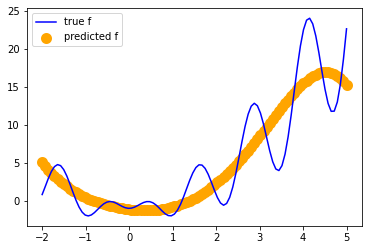

In [375]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**[j for j in range(6)]))
y_grid = f_true(x_grid)

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    if i == 0:
        X = numpy.ones((1, 1))
        t = x_new
        train = numpy.ones((1, 1))
        for j in range(1, 6):
            train[0][0] *= t
            X = numpy.concatenate((X, train), axis=1)
        XT = X.transpose()
        XTX = numpy.dot(XT, X)
        XTy = XT * y_new
    else:
        X = numpy.ones((1, 1))
        t = x_new
        train = numpy.ones((1, 1))
        for j in range(1, 6):
            train[0][0] *= t
            X = numpy.concatenate((X, train), axis=1)
        XT = X.transpose()
        XTX = XTX + numpy.dot(XT, X)
        XTy = XTy + XT * y_new
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        A = numpy.dot(numpy.linalg.inv(XTX), XTy)
        deg = 1
        y = A[0]
        for k in range(1, len(A)):
            deg *= x_grid
            y = y + deg * A[k]
        y_pred = y   #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()